In [2]:
import csv
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

%matplotlib inline

In the cell below, the memory will be opened on read mode, the empty rows will be filtered out with the function 'itertools', and then a new file will be created (write mode), called 'nowhitespace.csv'.


(maybe there's a way to deal with the raw file with the empty rows and thus remove the filtering).

In [3]:
# filtering out the whitespaces of the csv file of the measurements
with open('20170509_node09_id16_sn0788_FWversion3.5.76-Modem.csv', 'r') as f, open('nowhitespace.csv', 'w', newline='') as out:
    
    # file without whitespaces    
    filtered_f = itertools.filterfalse(lambda line: line.startswith('\n'), f)
    
    # memories from 2017 are csv files delimited by ; instead of ,
    r = csv.reader(filtered_f, delimiter=';')
    
    # written file is normal csv with comma
    w = csv.writer(out)
    for line in r:
        w.writerow(line)

Now we need to slice the memory to get only the rows we need to analyze, those being the ones corresponding to the Monitoring Records. Then we will create a dataframe in pandas to work with these rows.

We read the 'nowhitespace.csv' file line by line, seeking for the 'Monitoring' and 'Noise' lines. We need to get all of the lines between those two entries.

The number of the line corresponding to 'Monitoring' will be saved as begin, and the one of 'Noise' as end. 
We use the enumerate function to get the row's indexes.

The we create the dataframe using the pandas 'read_csv' function, passing the 'begin' and 'nrows' integers as parameters, corresponding to the lines we want as the dataframe.

I also used the 'parse_dates' argument to the function 'read_csv' in order to transform the dates on the 'Complete Date' or 'DateTime' to the best type to work with, where we will be able to select data by date more easily.

In [4]:
begin = 0
end = 0
with open('nowhitespace.csv', 'r') as f:
    csv_raw = csv.reader(f)
    for row_index, content in enumerate(csv_raw):
        if (content[0] == "Monitoring Records" or content[0] == "Monitoring"):
            #print(content, row_index)
            begin = row_index + 1
        if (content[0] == "Noise Records" or content[0] == "Noise"):
            #print(content, row_index)
            end = row_index - 1
            
nrows = end - begin           
    
    
df = pd.read_csv('nowhitespace.csv', skiprows = begin, nrows = nrows, parse_dates = ['Complete Date'])
df_raw = df.copy()

In [5]:
df.dtypes

Record                       object
Complete Date        datetime64[ns]
Min Bat Voltage             float64
Max Bat Voltage             float64
Battery Current             float64
3.3V IO                     float64
5V Analogic                 float64
3.3V Permanent              float64
Board Temperature             int64
Stack Temperature             int64
Unnamed: 10                 float64
dtype: object

In [6]:
df.head()

,Record,Complete Date,Min Bat Voltage,Max Bat Voltage,Battery Current,3.3V IO,5V Analogic,3.3V Permanent,Board Temperature,Stack Temperature,Unnamed: 10
0,MONI,2017-04-04 16:43:45,13.95703,13.97266,0.007812,3.3125,4.9375,3.3125,80,255,NaN
1,MONI,2017-04-04 16:49:06,13.91406,13.95703,0.007812,3.3125,4.9375,3.3125,244,255,NaN
2,MONI,2017-04-04 16:54:24,13.69922,13.95313,0.007812,3.3125,4.9375,3.3125,91,255,NaN
3,MONI,2017-04-04 16:59:43,13.67969,13.92578,0.007812,3.3125,4.9375,3.3125,68,255,NaN
4,MONI,2017-04-04 17:05:02,13.90625,13.94531,0.007812,3.3125,4.9375,3.3125,79,255,NaN


Let's make the Complete Date column the index and drop some unnecessary columns.

(I don't know why the 'Unnamed: 10' column was created. I will also drop it as it has no meaning.

In [7]:
df.set_index('Complete Date', inplace = True)
df.sort_index()
df = df.drop(columns=['Record', 'Unnamed: 10'])

In [8]:
df.head()

,Min Bat Voltage,Max Bat Voltage,Battery Current,3.3V IO,5V Analogic,3.3V Permanent,Board Temperature,Stack Temperature
Complete Date,,,,,,,,
2017-04-04 16:43:45,13.95703,13.97266,0.007812,3.3125,4.9375,3.3125,80,255
2017-04-04 16:49:06,13.91406,13.95703,0.007812,3.3125,4.9375,3.3125,244,255
2017-04-04 16:54:24,13.69922,13.95313,0.007812,3.3125,4.9375,3.3125,91,255
2017-04-04 16:59:43,13.67969,13.92578,0.007812,3.3125,4.9375,3.3125,68,255
2017-04-04 17:05:02,13.90625,13.94531,0.007812,3.3125,4.9375,3.3125,79,255


In [9]:
df.describe()

,Min Bat Voltage,Max Bat Voltage,Battery Current,3.3V IO,5V Analogic,3.3V Permanent,Board Temperature,Stack Temperature
count,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.0000,4134.000000,4134.0
mean,14.501881,14.559230,0.010583,3.307186,4.909984,3.3125,132.974601,255.0
std,0.215871,0.168934,0.002100,0.011741,0.010161,0.0000,59.439617,0.0
min,13.226560,13.898440,0.007812,3.281250,4.906250,3.3125,0.000000,255.0
25%,14.535160,14.570310,0.007812,3.312500,4.906250,3.3125,111.000000,255.0
50%,14.578130,14.593750,0.011719,3.312500,4.906250,3.3125,129.000000,255.0
75%,14.613280,14.625000,0.011719,3.312500,4.906250,3.3125,141.000000,255.0
max,14.816410,14.828130,0.023438,3.312500,4.968750,3.3125,255.000000,255.0


In [10]:
df = df.drop(columns=['3.3V Permanent', 'Stack Temperature'])

# dropping those as they remain constant throughout, no standard deviation at all.

df.head()

,Min Bat Voltage,Max Bat Voltage,Battery Current,3.3V IO,5V Analogic,Board Temperature
Complete Date,,,,,,
2017-04-04 16:43:45,13.95703,13.97266,0.007812,3.3125,4.9375,80
2017-04-04 16:49:06,13.91406,13.95703,0.007812,3.3125,4.9375,244
2017-04-04 16:54:24,13.69922,13.95313,0.007812,3.3125,4.9375,91
2017-04-04 16:59:43,13.67969,13.92578,0.007812,3.3125,4.9375,68
2017-04-04 17:05:02,13.90625,13.94531,0.007812,3.3125,4.9375,79


We see there is no missing data, as every column has exactly 4134 values on this file.
If there was data missing we'd have to drop them or fill them in. There are several methods to deal with missing data, we could try the average, the mode, deduce by correlation with other features etc.

If we needed to check for missing data we'd use this code:

In [11]:
# missing data

# create columns total and percent as a sum the times where the values were null, per row.
# Then create a new dataset (missing_data) with those columns.

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# Maybe drop columns where the percentage of missing values is greater then 20% ?

,Total,Percent
Board Temperature,0,0.0
5V Analogic,0,0.0
3.3V IO,0,0.0
Battery Current,0,0.0
Max Bat Voltage,0,0.0
Min Bat Voltage,0,0.0


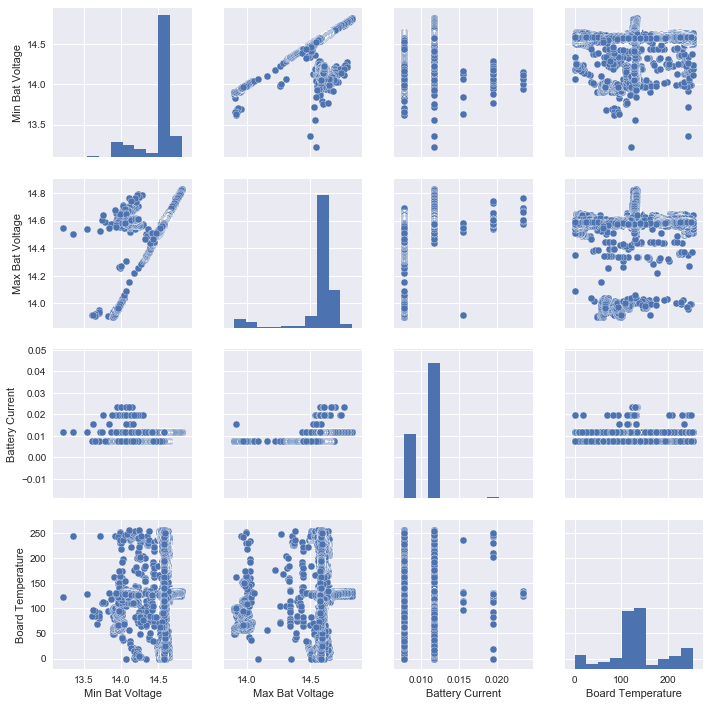

In [12]:
sns.set()
cols = ['Min Bat Voltage', 'Max Bat Voltage', 'Battery Current', 'Board Temperature']
sns.pairplot(df[cols], size = 2.5)
plt.show();

Text(0,0.5,'Min Bat Voltage')

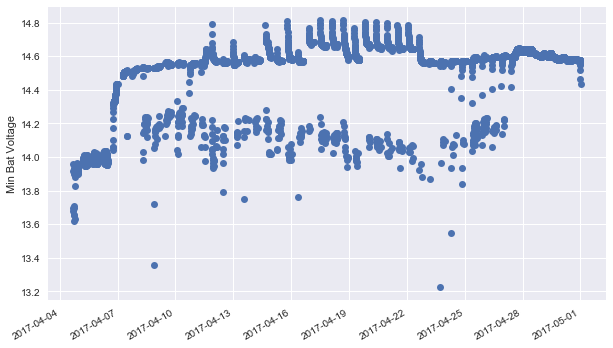

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot_date(df.index, df['Min Bat Voltage'])
fig.autofmt_xdate()
#ax.set_xlim([datetime.datetime(2015, 2, 27, 15), datetime.datetime(2015, 2, 27, 23)])
plt.ylabel('Min Bat Voltage')